# Taming Text

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import nltk
from os import path
from wordcloud import WordCloud # pip install wordcloud
from PIL import Image

%matplotlib inline

First and foremost lets just load the data:

In [2]:
folder = 'hillary-clinton-emails/'
aliases = pd.read_csv(folder + 'Aliases.csv', index_col='Id')
email_receivers = pd.read_csv(folder + 'EmailReceivers.csv', index_col='Id')
emails = pd.read_csv(folder + 'Emails.csv', index_col='Id')
persons = pd.read_csv(folder + 'Persons.csv', index_col='Id')

In [3]:
aliases.head()

,Alias,PersonId
Id,,
1,111th congress,1
2,agna usemb kabul afghanistan,2
3,ap,3
4,asuncion,4
5,alec,5


In [4]:
email_receivers.head()

,EmailId,PersonId
Id,,
1,1,80
2,2,80
3,3,228
4,3,80
5,4,80


In [5]:
emails.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [6]:
emails.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [7]:
emailsList = emails['ExtractedBodyText'].tolist()
cleanedList = [str(x) for x in emailsList if str(x) != 'nan']

In [8]:
rawExtractedBody = ' '.join(cleanedList)

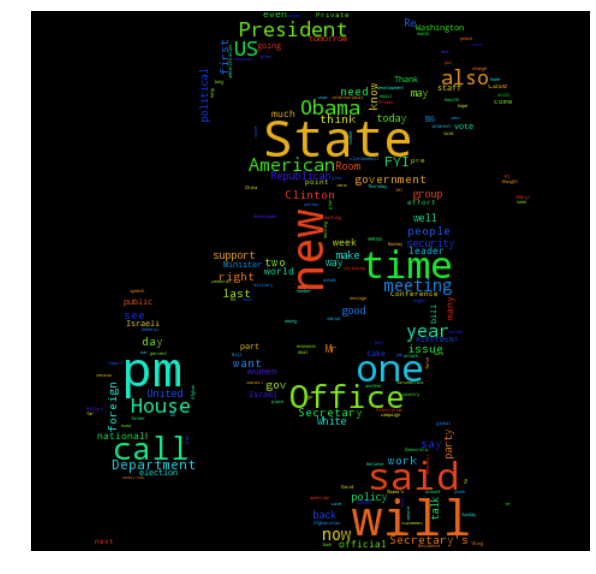

In [75]:
def generate_word_cloud(text):
    mask = np.array(Image.open("hillary_mask_1.jpg"))
    
    # Generate a word cloud image
    wordcloud = WordCloud(mask=mask).generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud)
    plt.axis("off")
    
    fig = plt.gcf()
    fig.set_size_inches(10,10)

    '''
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, mask=mask).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    '''
    
generate_word_cloud(rawExtractedBody)

## Preprosessing

- Tokenizing
- Stemming
- Stop word removal

In [34]:
from nltk.tokenize import word_tokenize

tokens = pd.Series(word_tokenize(rawExtractedBody))
tokens.head()

0          B6
1    Thursday
2           ,
3       March
4           3
dtype: object

In [45]:
lowered_tokens = tokens.apply(lambda token: token.strip().lower())

lowered_tokens = lowered_tokens[lowered_tokens != '']
lowered_tokens.head()

0          b6
1    thursday
2           ,
3       march
4           3
dtype: object

### Removing non-english words

In [41]:
from nltk.corpus import words
print(words.readme())

english = set(words.words())

Wordlists

en: English, http://en.wikipedia.org/wiki/Words_(Unix)
en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932)



In [53]:
english = set(words.words())
filter_english = lowered_tokens.apply(lambda x: x in english)

valid_tokens = lowered_tokens[filter_english]
valid_tokens.head(10)

3      march
9          h
11    latest
12       how
14        is
17       and
18      more
22      memo
29      memo
34     march
dtype: object

### Remove 'short' words

Under the assumption that words with length <= 3 contains no or little expressiveness, we chose to remove them:

In [57]:
short_filter = valid_tokens.apply(lambda token: len(token) > 3)

long_tokens = valid_tokens[short_filter]
long_tokens.head()

3      march
11    latest
18      more
22      memo
29      memo
dtype: object

### Stopword removal

In [61]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

stopword_filter = long_tokens.apply(lambda x: x not in stop)
nonstop_tokens = long_tokens[stopword_filter]

In [62]:
nonstop_tokens.head(15)

3          march
11        latest
22          memo
29          memo
34         march
50         march
62        latest
74          memo
80         print
83         print
107         meet
110    extremist
111       behind
113         film
115      sparked
dtype: object

In [71]:
print('Our cleaning took away %.2f%% of the words' % (100*(1 - nonstop_tokens.shape[0] / tokens.shape[0])))

Our cleaning took away 71.97% of the words


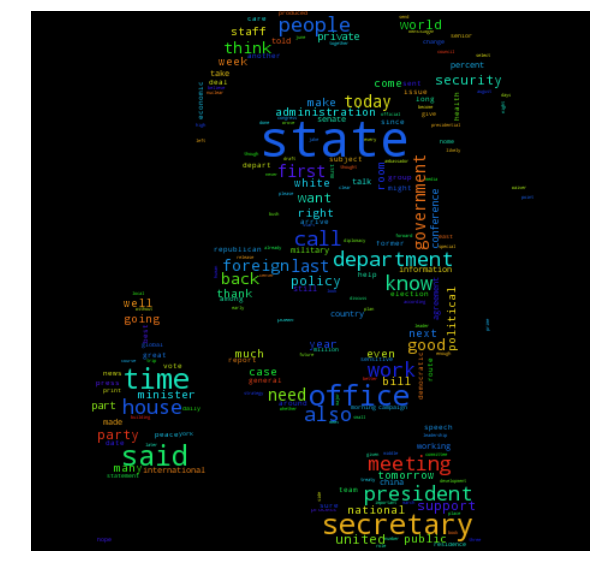

In [76]:
generate_word_cloud(nonstop_tokens.to_string(index=False, header=False))

## 2.


In [19]:
emailsList = pd.Series(emails['ExtractedBodyText'].astype(str))


In [20]:
# Drop nans
emailsList = emailsList[emailsList.apply(lambda x: x != 'nan')]



### Country lookup

In [21]:
import pycountry # pip install pycountry
len(pycountry.countries)

249

In [22]:
countries = [{'name': c.name, 'short_name': c.alpha_2} for c in pycountry.countries]

In [23]:
import re

def lookup_country(email):
    counts = {}
    
    words = re.findall(r"[\w']+", email)
    for country in countries:
        count = 0
        
        count += email.count(country['name'])
        #count += words.count( country['short_name'] )
        
        # Count allso shortnames for UK and USA
        if country['name'] == 'United States':
            count += words.count('USA')
            count += words.count('US')
            
        elif country['name'] == 'United Kingdom':
            count += words.count('UK')
            count += words.count('GB')
        
        if count != 0:
            counts[country['name']] = count
            
    if counts:
        # Get the country with highest count  
        top_country = max(counts, key=counts.get)
        return top_country
    else:
        return

In [24]:
lookup_country("Norway United States Poland Poland Poland Norway, GB, UK, USA")

'Poland'

In [25]:
country_mentioned = emailsList.apply(lookup_country)

In [26]:
country_mentioned.value_counts()

United States         167
Israel                 80
Haiti                  63
Pakistan               47
Libya                  47
Afghanistan            46
China                  45
India                  23
Iraq                   22
Honduras               21
Mexico                 20
Ireland                19
United Kingdom         16
Egypt                  13
Qatar                  12
Turkey                 12
Cuba                   11
Palau                  10
Japan                  10
Brazil                 10
Colombia               10
France                 10
Indonesia               9
Sri Lanka               9
Argentina               9
Ukraine                 6
Sudan                   6
Angola                  6
Germany                 5
Singapore               5
                     ... 
Bahrain                 1
Zambia                  1
Dominican Republic      1
Nauru                   1
Ghana                   1
Romania                 1
Tunisia                 1
Algeria     

### TODO: problem 'fixed', but can be mentioned in discussion
Problem with current approach:
    - Tokenization causes country names to become seperated -> 'United States' becomes 'United', 'States' and thus pycountry.countries.lookup fails for such cases
    - there are a lot of abbreviations as PM (prime minister ?) which are actual countries abbreviations (Saint Pierre and Miquelon) but we cannot simply get rid of all the abbreviations since USA or UK is widely used.

## Sentimental analyzis

### Step 1: Cleaning

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

//anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [28]:
tokenized = emailsList.apply(tokenizer.tokenize)
tokenized.head()

Id
2    [B6, Thursday, March, 3, 2011, 9, 45, PM, H, L...
3                                                [Thx]
5    [H, hrod17, clintonemail, com, Friday, March, ...
6    [Pis, print, H, hrod17, clintonernailcom, Wedn...
8    [H, hrod17, clintonemail, corn, Friday, March,...
Name: ExtractedBodyText, dtype: object

In [31]:
no_stopwords = tokenized.apply(lambda x: [w for w in x if (w not in stop) ])

In [32]:
no_stopwords.head()

Id
2    [B6, Thursday, March, 3, 2011, 9, 45, PM, H, L...
3                                                [Thx]
5    [H, hrod17, clintonemail, com, Friday, March, ...
6    [Pis, print, H, hrod17, clintonernailcom, Wedn...
8    [H, hrod17, clintonemail, corn, Friday, March,...
Name: ExtractedBodyText, dtype: object

In [29]:
stemmed = tokenized.apply(lambda x: [stemmer.stem(w) for w in x])

In [30]:
stemmed.head()

Id
2    [b6, thursday, march, 3, 2011, 9, 45, pm, h, l...
3                                                [thx]
5    [h, hrod17, clintonemail, com, friday, march, ...
6    [pis, print, h, hrod17, clintonernailcom, wedn...
8    [h, hrod17, clintonemail, corn, friday, march,...
Name: ExtractedBodyText, dtype: object

In [39]:
nslist = no_stopwords.tolist()

### Step 2: Sentiment analysis

We want 
#### FYI: This takes a lot of time

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()
sentiments = no_stopwords.apply(lambda x: sent_analyzer.polarity_scores(' '.join(x)))

In [ ]:
def classify_sentiment(x):
    '''
    score = x['pos'] + x['neg']
    if score == 0:
        return 0
    elif score < 0:
        return -1
    else:
        return 1
    '''
    return x['compound']
    
scores = sentiments.apply(classify_sentiment)

### Step 3: aggregation

In [ ]:
sentiments = pd.DataFrame(scores)
sentiments['country'] = country_mentioned

country_sentiments = sentiments.groupby('country').mean().reset_index()
country_sentiments.columns = ['country', 'sentiment']

country_counts = sentiments.groupby('country').count().reset_index()

In [ ]:
country_sentiments.sort_values(by='sentiment').head(10)

In [ ]:
# Dropping to get rid of the case where no country were mentioned
top_country_counts = country_counts.sort_values(by='ExtractedBodyText', ascending=False).drop(0)
top_country_counts.columns = ['country', 'count']

treshold = 2
top_country_counts = top_country_counts[top_country_counts['count'] > treshold]

In [ ]:
df = top_country_counts.join(country_sentiments.sentiment, how='left')

df[df['count'] >= 10].sort_values(by='sentiment')

### Todo on sentiment analysis:

- Make dataframe with countries and scores
- Aggregrate score over countries
- Plot histogram

## 3

In [33]:
from gensim import corpora, models
NUM_TOPICS = 50

//anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [35]:
#no_stopwords seem to be a mess still
no_stopwords_list = no_stopwords.tolist()
dictionary = corpora.Dictionary(no_stopwords_list)
corpus = [dictionary.doc2bow(email) for email in no_stopwords_list]

In [36]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS)

In [37]:
for i in range(0, NUM_TOPICS):
    temp = model.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    print("Top 10 terms for topic #" + str(i) + ": "+ ", ".join([str(i[0]) for i in terms]))


Top 10 terms for topic #0: I, Will, call, know, Yes, Let, tomorrow, go, going, Woodward
Top 10 terms for topic #1: 1, 2010, Obama, 2, voters, The, opinion, would, percent, Cooperation
Top 10 terms for topic #2: I, w, yet, like, mtg, see, UN, Have, would, plan
Top 10 terms for topic #3: Bloomberg, 647, 202, I, please, need, office, cdm, reach, S
Top 10 terms for topic #4: B6, IN, PART, RELEASE, Thx, B5, gender, doc, discuss, Sent
Top 10 terms for topic #5: I, traffic, defenses, See, move, email, Brief, try, grid, verification
Top 10 terms for topic #6: 4, 1, B1, D, B, pm, Declassify, Office, 12, 00
Top 10 terms for topic #7: Richards, Press, 03, Nixon, sullivan, Club, Jockey, Howard, picture, Attached
Top 10 terms for topic #8: Netanyahu, Guards, See, Argentina, Iranian, motion, ideally, heroic, letter, The
Top 10 terms for topic #9: I, mayor, Russia, On, Abbas, ready, agree, We, Ashton, cut
Top 10 terms for topic #10: pm, Secretary, w, 00, 8, 10, 30, Office, 15, 2
Top 10 terms for topi

In [49]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis   #pip install pyldavis

vis_data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(vis_data)

//anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
//anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
//anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
//anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
//anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
//anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationW

## Assignment
1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

2. Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

3. Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

4. *BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.


In [15]:
df = pd.DataFrame([[1,"hey"], [1,"brother"]], columns=['id', 'text'])

In [22]:
df.groupby(by='id')['text'].apply(lambda x: ' '.join(x))

id
1    hey brother
Name: text, dtype: object